## Step 1: Load and Explore the Dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = "./data/GlobalWeatherRepository.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57101 entries, 0 to 57100
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       57101 non-null  object 
 1   location_name                 57101 non-null  object 
 2   latitude                      57101 non-null  float64
 3   longitude                     57101 non-null  float64
 4   timezone                      57101 non-null  object 
 5   last_updated_epoch            57101 non-null  int64  
 6   last_updated                  57101 non-null  object 
 7   temperature_celsius           57101 non-null  float64
 8   temperature_fahrenheit        57101 non-null  float64
 9   condition_text                57101 non-null  object 
 10  wind_mph                      57101 non-null  float64
 11  wind_kph                      57101 non-null  float64
 12  wind_degree                   57101 non-null  int64  
 13  w

(None,
        country     location_name  latitude  longitude        timezone  \
 0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
 1      Albania            Tirana     41.33      19.82   Europe/Tirane   
 2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
 3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
 4       Angola            Luanda     -8.84      13.23   Africa/Luanda   
 
    last_updated_epoch      last_updated  temperature_celsius  \
 0          1715849100  2024-05-16 13:15                 26.6   
 1          1715849100  2024-05-16 10:45                 19.0   
 2          1715849100  2024-05-16 09:45                 23.0   
 3          1715849100  2024-05-16 10:45                  6.3   
 4          1715849100  2024-05-16 09:45                 26.0   
 
    temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
 0                    79.8  Partly Cloudy  ...                8.4   
 1               

## Step 2: Data Cleaning & Preprocessing

In [2]:
# Convert the 'last_updated' column to datetime format
df['last_updated'] = pd.to_datetime(df['last_updated'])

# Select relevant columns for visualization
df_cleaned = df[['country', 'location_name', 'latitude', 'longitude', 'last_updated',
                 'temperature_celsius', 'wind_kph', 'humidity', 'pressure_mb', 
                 'air_quality_us-epa-index', 'air_quality_PM2.5']]

# Check for missing values
missing_values = df_cleaned.isnull().sum()

# Display cleaned data information
df_cleaned.info(), missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57101 entries, 0 to 57100
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   country                   57101 non-null  object        
 1   location_name             57101 non-null  object        
 2   latitude                  57101 non-null  float64       
 3   longitude                 57101 non-null  float64       
 4   last_updated              57101 non-null  datetime64[ns]
 5   temperature_celsius       57101 non-null  float64       
 6   wind_kph                  57101 non-null  float64       
 7   humidity                  57101 non-null  int64         
 8   pressure_mb               57101 non-null  float64       
 9   air_quality_us-epa-index  57101 non-null  int64         
 10  air_quality_PM2.5         57101 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 4.8+ MB


(None,
 country                     0
 location_name               0
 latitude                    0
 longitude                   0
 last_updated                0
 temperature_celsius         0
 wind_kph                    0
 humidity                    0
 pressure_mb                 0
 air_quality_us-epa-index    0
 air_quality_PM2.5           0
 dtype: int64)

## Step 3: Visualization 1 – Global Temperature Trends

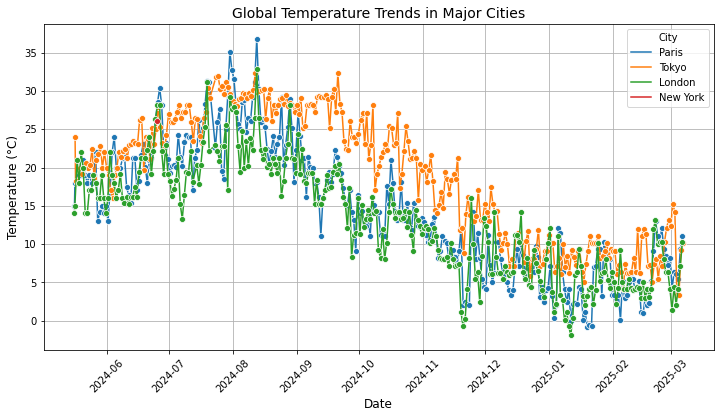

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select data for major cities
top_cities = ['New York', 'London', 'Sydney', 'Tokyo', 'Paris']
df_temp_trend = df_cleaned[df_cleaned['location_name'].isin(top_cities)]

# Plot temperature trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_temp_trend, x='last_updated', y='temperature_celsius', hue='location_name', marker='o')

# Enhance visualization
plt.title("Global Temperature Trends in Major Cities", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.legend(title="City")
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()


## Step 4: Visualization 2 – Wind Speed vs. Humidity Scatter Plot


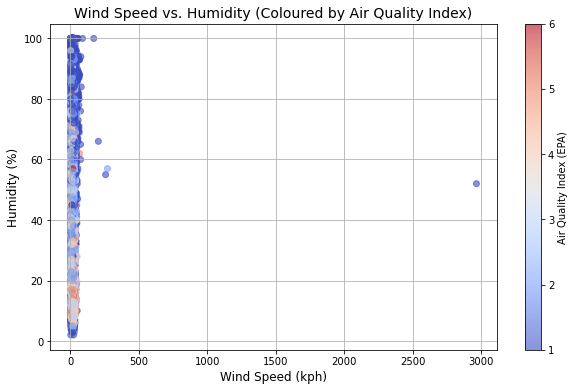

In [4]:
# Scatter plot of Wind Speed vs. Humidity
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_cleaned['wind_kph'], df_cleaned['humidity'], 
                      c=df_cleaned['air_quality_us-epa-index'], cmap='coolwarm', alpha=0.6)

# Add color bar for air quality
cbar = plt.colorbar(scatter)
cbar.set_label("Air Quality Index (EPA)")

# Labels and title
plt.title("Wind Speed vs. Humidity (Coloured by Air Quality Index)", fontsize=14)
plt.xlabel("Wind Speed (kph)", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)

# Show plot
plt.show()


## Step 5: Interactive Visualization – US Map for Air Quality

In [10]:
import plotly.express as px

# Filter dataset to include only US air quality records
df_us = df_cleaned[df_cleaned['country'].isin(['United States of America', 'USA United States of America'])]

# Create an interactive map for US air quality only
fig = px.scatter_geo(df_us,
                     lat='latitude', lon='longitude',
                     color='air_quality_us-epa-index',
                     size='air_quality_PM2.5',
                     hover_name='location_name',
                     title="US Air Quality Index (EPA)",
                     color_continuous_scale="Viridis",
                     scope="usa")  # Focus map on the United States

# Show interactive plot
fig.show()